In [22]:
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from itertools import combinations

# Import as dataframe
df = pd.read_csv('MarketBasketAnalysis/GroceryStoreDataSet.csv', header = None)

In [23]:
basket = []

df.values[0, 0].split(',')

for i in range(len(df)):
    basket.append(df.values[i, 0].split(','))

In [24]:
# Instantiate
te = TransactionEncoder()

# Fit and Transform the data into True and False (1 and 0)
item = te.fit(basket).transform(basket)

# Create DataFrame
df = pd.DataFrame(item, columns = te.columns_)

In [25]:
# when max_len = 2, itemsets length ranges between 1 item and two items
items = apriori(df, min_support=0.01, use_colnames=True, max_len = 4)
items

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(BISCUIT, TEA, BREAD, MAGGI)"
79,0.10,"(BISCUIT, COCK, CORNFLAKES, COFFEE)"
80,0.05,"(MILK, BREAD, JAM, MAGGI)"
81,0.05,"(TEA, BREAD, JAM, MAGGI)"


In [26]:
import numpy as np
transactions = []
for i in np.arange(0,len(items)):
    transactions.append(list(items['itemsets'][i]))

In [27]:
#holding dict
mydict = {}

for i in range(len(transactions)):
    #2 combinations of baskets
    for j,k in combinations(transactions[i],2):
        #setdefauly, and append a 1 for each time it is found
        mydict.setdefault((j,k),[]).append(1)   

In [28]:
G = nx.Graph()
#add the edges, if weight is greater than 20 - ie 20 transactions
G.add_edges_from = [G.add_edge(i[0], i[1], weight = len(j)) for i,j in mydict.items() if len(j) > 0];

/Users/avielstern/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


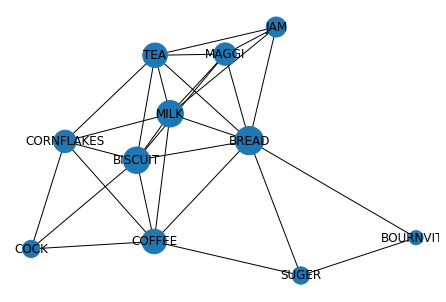

In [29]:
#make a graph
G = nx.Graph()
#add the edges, if weight is greater than 20 - ie 20 transactions
G.add_edges_from = [G.add_edge(i[0], i[1], weight = len(j)) for i,j in mydict.items() if len(j) > 2];

degree_df = pd.DataFrame.from_dict(G.degree)
nx.draw(G, node_size = degree_df[1]*100, with_labels=True)

In [30]:
list(nx.find_cliques(G))

[['COCK', 'BISCUIT', 'CORNFLAKES', 'COFFEE'],
 ['CORNFLAKES', 'BISCUIT', 'MILK', 'TEA'],
 ['CORNFLAKES', 'BISCUIT', 'MILK', 'COFFEE'],
 ['BREAD', 'MILK', 'BISCUIT', 'TEA', 'MAGGI'],
 ['BREAD', 'MILK', 'BISCUIT', 'COFFEE'],
 ['BREAD', 'MILK', 'JAM', 'TEA', 'MAGGI'],
 ['BREAD', 'SUGER', 'COFFEE'],
 ['BREAD', 'SUGER', 'BOURNVITA']]

In [31]:
nx.betweenness_centrality(G)

{'BISCUIT': 0.10074074074074073,
 'BREAD': 0.2788888888888889,
 'COCK': 0.0,
 'COFFEE': 0.12000000000000001,
 'CORNFLAKES': 0.02962962962962963,
 'MAGGI': 0.008333333333333333,
 'MILK': 0.06648148148148149,
 'TEA': 0.03962962962962963,
 'BOURNVITA': 0.0,
 'SUGER': 0.022962962962962963,
 'JAM': 0.0}